In [2]:
import cv2 as cv
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def psnr(img1, img2):
    img1 = img1.astype(np.int16)
    img2 = img2.astype(np.int16)
    mse = np.mean(np.square(img1 - img2))
    
    if mse==0:
        return np.Inf
    return 10*math.log10(255*255/mse)

In [ ]:
def ssim(img1, img2):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    
    C1 = (0.01 * 255) ** 2
    C2 = (0.03 * 255) ** 2

    kernel = cv.getGaussianKernel(11, 1.5)
    window = kernel @ kernel.T

    mu1 = cv.filter2D(img1, -1, window)
    mu2 = cv.filter2D(img2, -1, window)

    mu1_sq = mu1 ** 2
    mu2_sq = mu2 ** 2
    mu1_mu2 = mu1 * mu2

    sigma1_sq = cv.filter2D(img1 ** 2, -1, window) - mu1_sq
    sigma2_sq = cv.filter2D(img2 ** 2, -1, window) - mu2_sq
    sigma12   = cv.filter2D(img1 * img2, -1, window) - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / \
               ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))

    return ssim_map.mean()



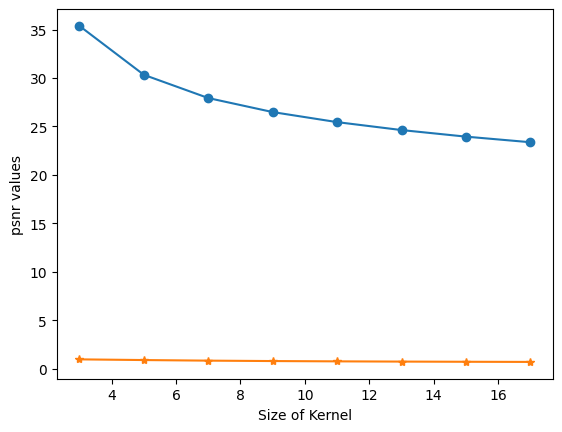

In [ ]:
def box_filter_simple(img, ksize):

    pad = ksize // 2
    h, w = img.shape
    output = np.zeros((h, w), dtype=np.float32)  

    padded_img = np.pad(img, pad, mode='reflect').astype(np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+ksize, j:j+ksize]
            output[i, j] = np.mean(region)  
    return np.clip(output, 0, 255).astype(np.uint8)


img = cv.imread("org.jpg", cv.IMREAD_GRAYSCALE)
kernel_sizes=[]
psnr_values=[]
ssim_values=[]
for i in range(3,18,2):
    kernel_sizes.append(i)
    blurred = box_filter_simple(img, i)
    psnr_values.append(psnr(img,blurred))
    ssim_values.append(ssim(img,blurred))
    
plt.plot(kernel_sizes,psnr_values,marker='o')
plt.plot(kernel_sizes,ssim_values,marker='*')
plt.xlabel("Size of Kernel")
plt.ylabel("psnr and ssim values")
plt.show()
# plt.plot(kernel_sizes,ssim_values,marker='o')
# cv.imwrite("blurred_simple.jpg", blurred)

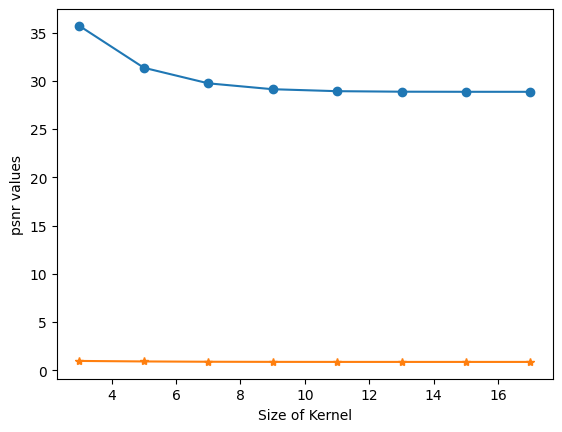

In [ ]:
def gaussian_kernel(ksize, sigma):

    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

def gaussian_filter_simple(img, ksize, sigma):

    kernel = gaussian_kernel(ksize, sigma)
    pad = ksize // 2
    h, w = img.shape
    output = np.zeros((h, w), dtype=np.float32)

    padded_img = np.pad(img, pad, mode='reflect').astype(np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+ksize, j:j+ksize]
            output[i, j] = np.sum(region * kernel)

    return np.clip(output, 0, 255).astype(np.uint8)

img = cv.imread("org.jpg", cv.IMREAD_GRAYSCALE)
kernel_sizes=[]
psnr_values=[]
ssim_values=[]
for i in range(3,18,2):
    kernel_sizes.append(i)
    blurred = gaussian_filter_simple(img, i,2)
    psnr_values.append(psnr(img,blurred))
    ssim_values.append(ssim(img,blurred))
    
plt.plot(kernel_sizes,psnr_values,marker='o')
plt.plot(kernel_sizes,ssim_values,marker='*')
plt.xlabel("Size of Kernel")
plt.ylabel("psnr and ssim values")
plt.show()

